In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
display (os.getcwd())

'c:\\Users\\iamha\\OneDrive\\Documents\\SalesForecasting'

In [3]:
dt = pd.read_csv('Train.csv')
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print (dt.shape)

(8523, 12)


In [5]:
display(dt.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
display(dt.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
display (dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

# Unique Values

In [8]:
display (dt.apply(lambda x: len(x.unique())))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
display (dt.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
cat_col = []
for x in dt.dtypes.index:
    if dt.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
for col in cat_col:
    print(col , len(dt[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


# Value Counts 

In [13]:
for col in cat_col:
    print(col)
    print(dt[col].value_counts())
    print()
    print ('*' *50)

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2

In [14]:
miss_bool = dt['Item_Weight'].isnull()
display (miss_bool)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
display (dt['Item_Weight'].isnull().sum())

np.int64(1463)

In [16]:
Item_Weight_null = dt[dt['Item_Weight'].isna()]
display (Item_Weight_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [17]:
Item_Weight_null['Item_Identifier'].value_counts()

Item_Identifier
FDC14    2
FDV20    2
FDH10    2
FDW39    2
FDN34    2
        ..
FDS32    1
FDL10    1
FDT24    1
FDY28    1
FDC37    1
Name: count, Length: 1142, dtype: int64

# Pivot Table

## Item Weight & Item Identifier

In [18]:
item_weight_mean = dt.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [19]:
display (dt['Item_Identifier'])

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

# Handaling Null Values

## Item Identifier

In [20]:
for i, item in enumerate(dt['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dt['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight'])

In [21]:
result = dt['Item_Weight'].isnull().sum()
display (result)

np.int64(0)

# Pivot Table

## Outlet Size

In [22]:
result = dt.groupby('Outlet_Size').agg({'Outlet_Size': np.size})
display (result)

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [23]:
result= dt['Outlet_Size'].isnull().sum()
display (result)

np.int64(2410)

In [24]:
Outlet_Size_null= dt[dt['Outlet_Size'].isna()]
display (Outlet_Size_null)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [25]:
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

## Outlet Type & Outlet Size

In [26]:
result= dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [27]:
outlet_size_mode = dt.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [28]:
miss_bool = dt['Outlet_Size'].isnull()
dt.loc[miss_bool, 'Outlet_Size'] = dt.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [29]:
display (dt['Outlet_Size'].isnull().sum())

np.int64(0)

In [30]:
result = dt.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':["size"]})
display (result)

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [31]:
display (sum(dt['Item_Visibility']==0))

526

# Handaling Null Values

## Item Visibility

In [32]:
dt.loc[:, 'Item_Visibility'].replace([0], [dt['Item_Visibility'].mean()], inplace=True)

In [33]:
display(sum(dt['Item_Visibility']==0))

0

# Data Cleaning(Item Fat Content)

In [34]:
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [35]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dt['Item_Fat_Content'].value_counts()
display (result)

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [36]:
dt['New_Item_Type'] = dt['Item_Identifier'].apply(lambda x: x[:2])
display (dt['New_Item_Type'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [37]:
display (dt['New_Item_Type'].value_counts())

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [38]:
dt['New_Item_Type'] = dt['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dt['New_Item_Type'].value_counts())

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [39]:
display (dt['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Pivot Table

## New Item Type & Item Fat Content

In [40]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

# Data Cleaning(New Item Type)

In [41]:
dt.loc[dt['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dt['Item_Fat_Content'].value_counts())
display (result)

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [42]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [43]:
result = dt.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [44]:
dt['Outlet_Years'] = 2025 - dt['Outlet_Establishment_Year']
print (dt['Outlet_Years'])

0       26
1       16
2       26
3       27
4       38
        ..
8518    38
8519    23
8520    21
8521    16
8522    28
Name: Outlet_Years, Length: 8523, dtype: int64


In [45]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,26
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,27
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,38


# Graphical Representation

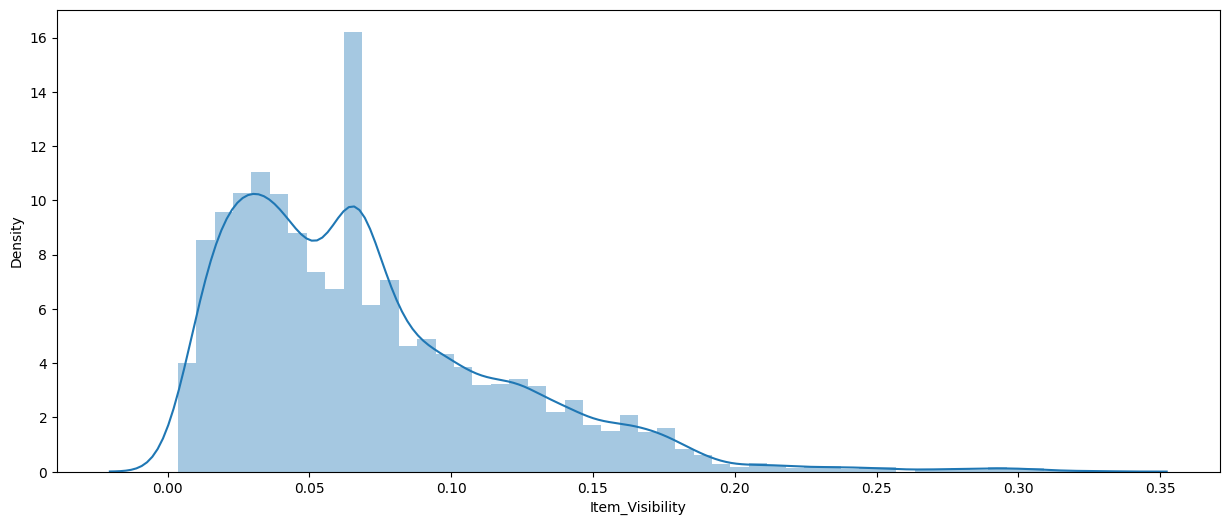

In [46]:
sns.distplot(dt['Item_Visibility'])
plt.show()

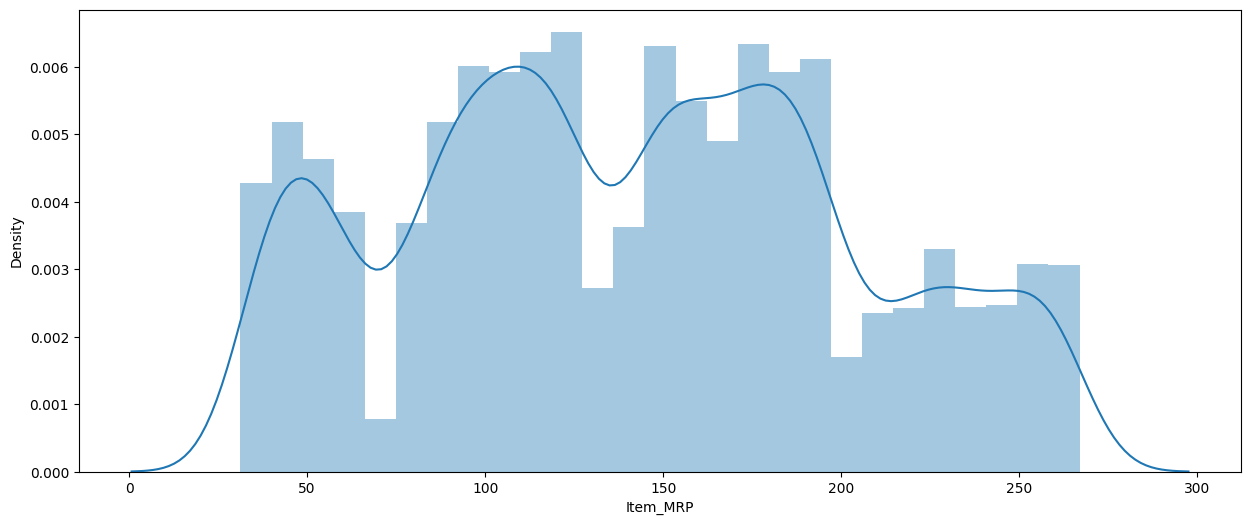

In [47]:
sns.distplot(dt['Item_MRP'])
plt.show()

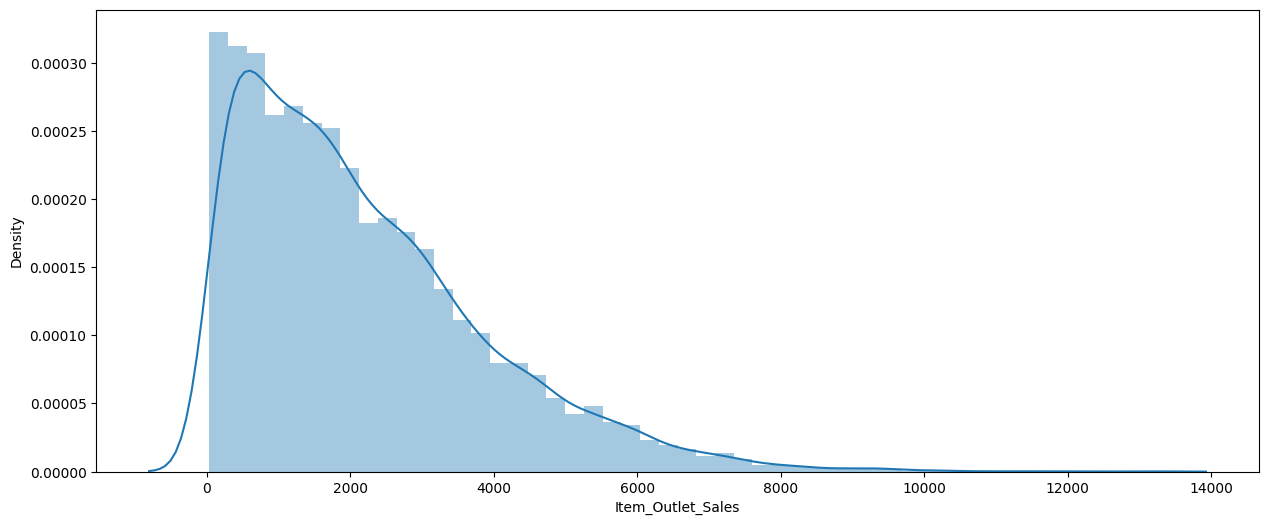

In [48]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

In [49]:
dt['Item_Outlet_Sales'] = np.log(1+dt['Item_Outlet_Sales'])
display (dt['Item_Outlet_Sales'])

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

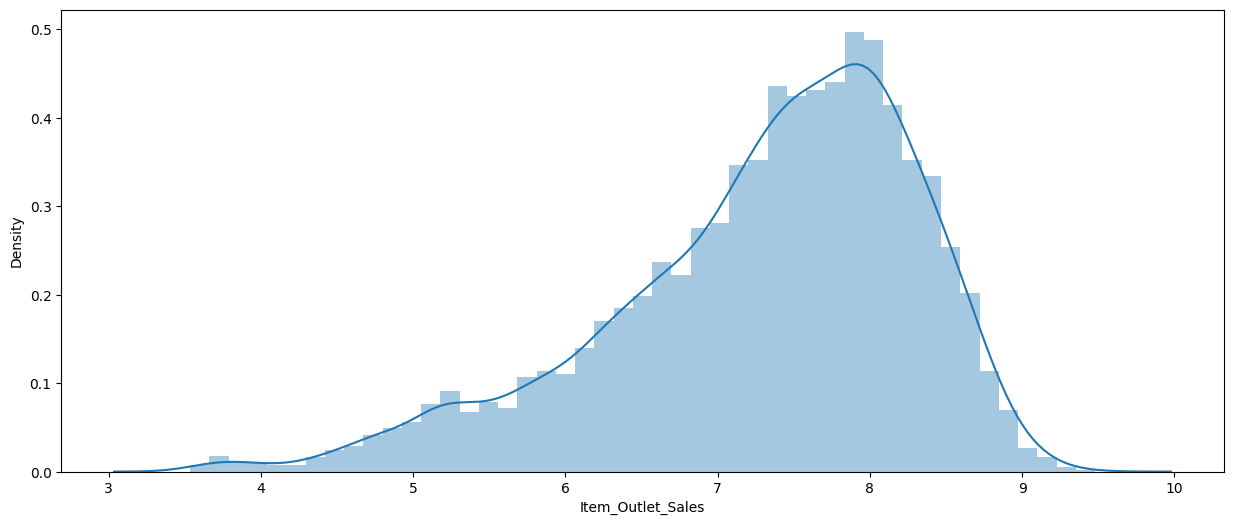

In [50]:
sns.distplot(dt['Item_Outlet_Sales'])
plt.show()

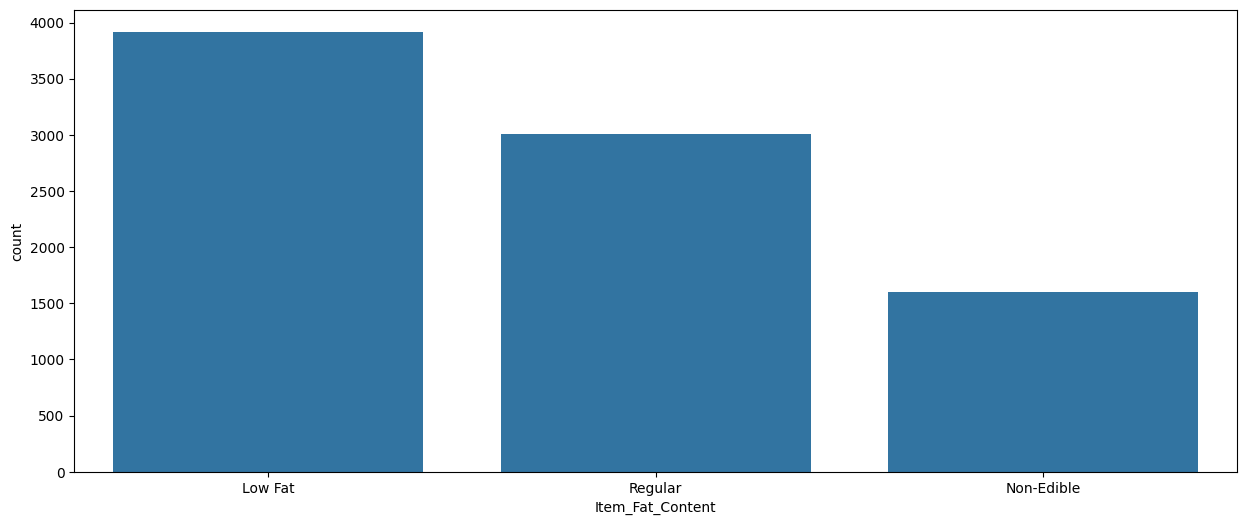

In [51]:
sns.countplot(x = dt["Item_Fat_Content"])
plt.show()

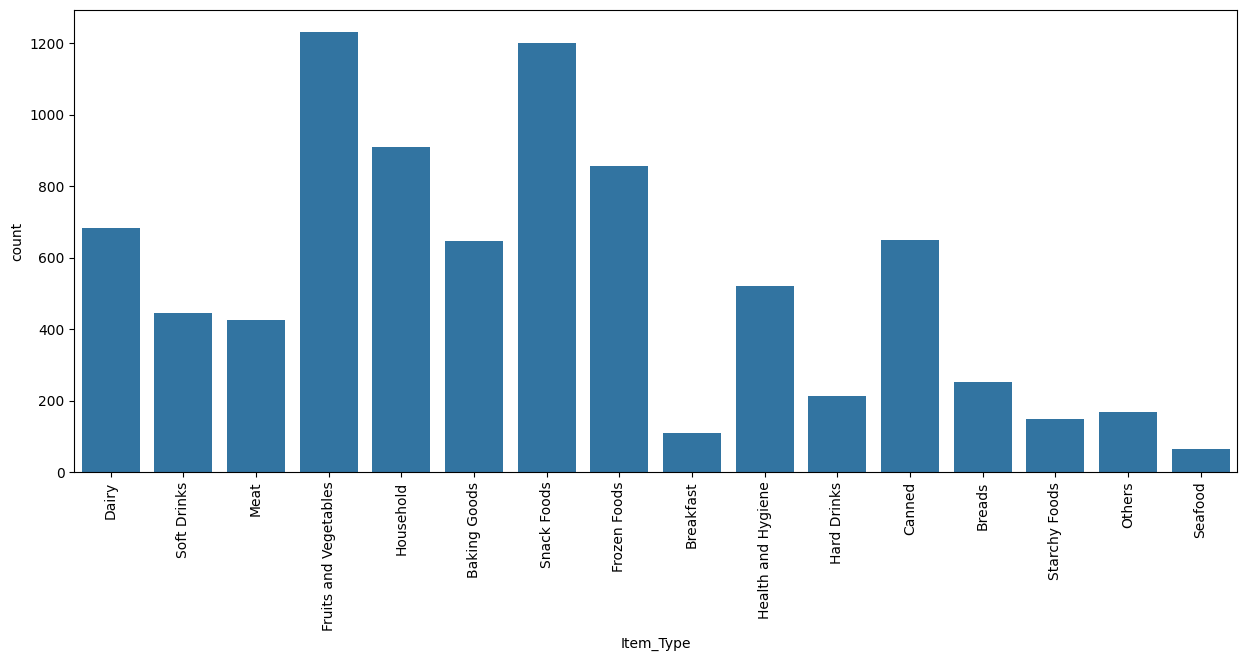

In [52]:
l = list(dt['Item_Type'].unique()) 
chart = sns.countplot(x =dt["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()

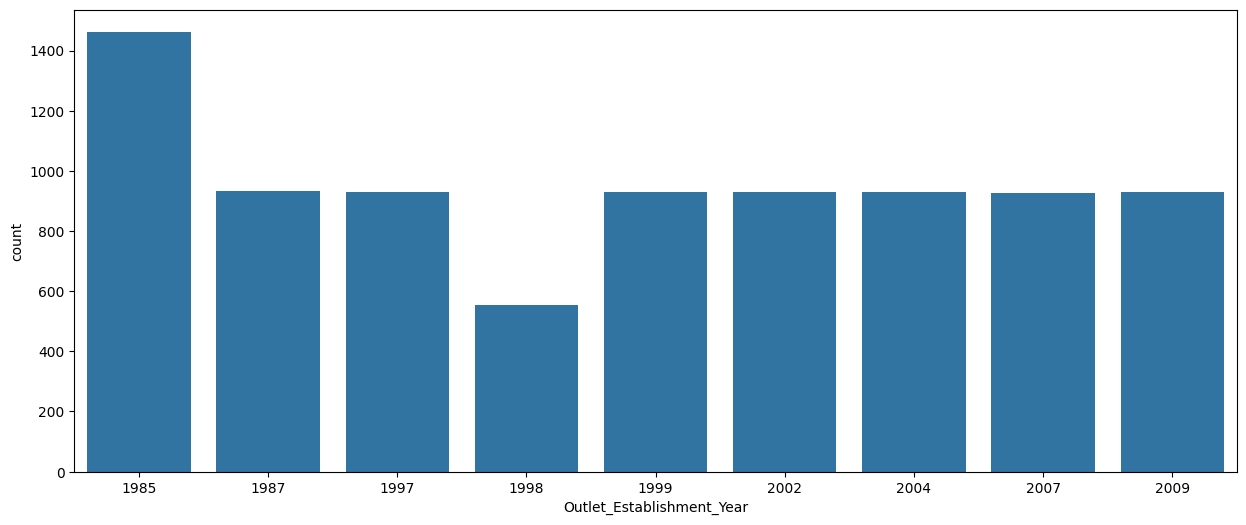

In [53]:
sns.countplot(x= dt['Outlet_Establishment_Year'])
plt.show()

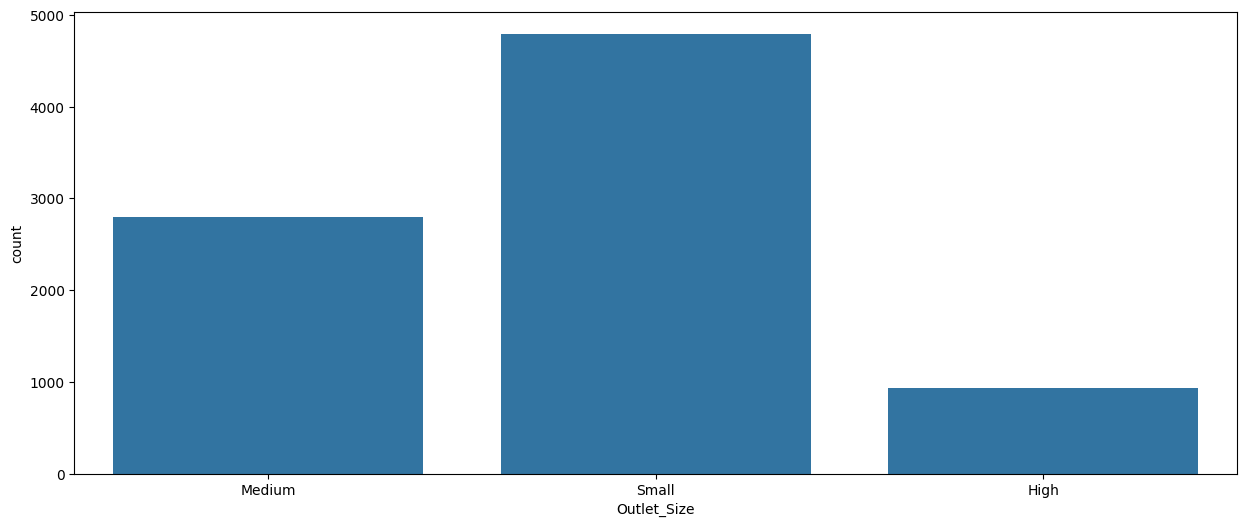

In [54]:
sns.countplot(x=dt['Outlet_Size'])
plt.show()

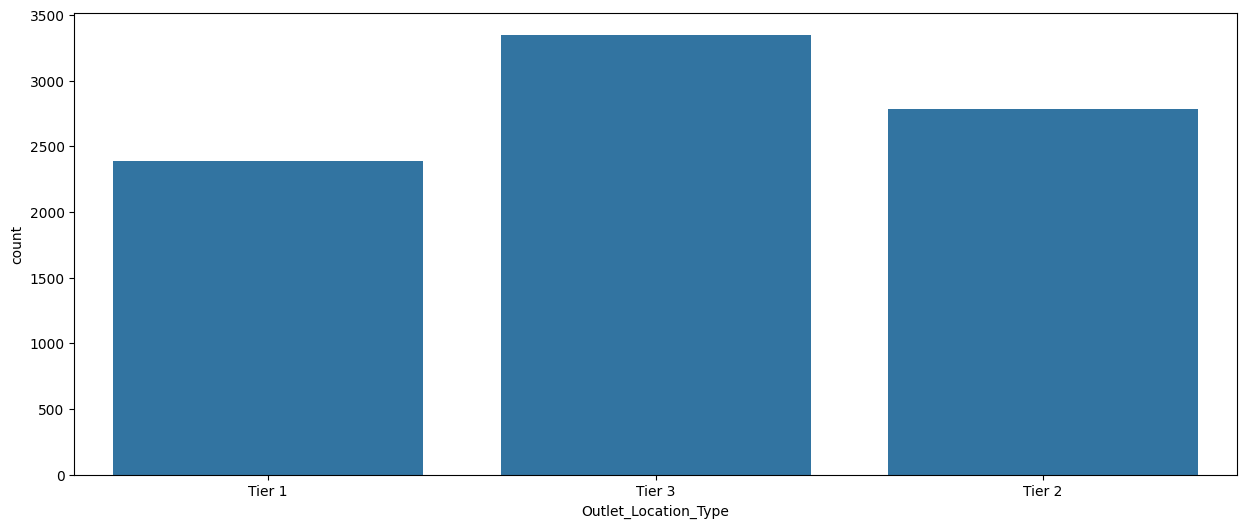

In [55]:
sns.countplot(x=dt['Outlet_Location_Type'])
plt.show()

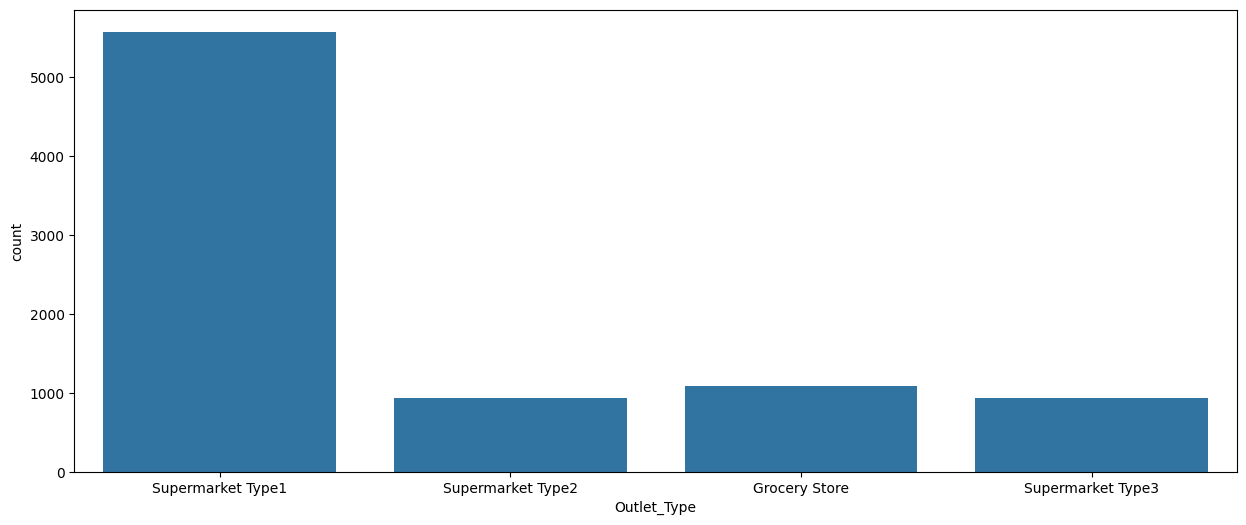

In [56]:
sns.countplot(x= dt['Outlet_Type'])
plt.show()

In [57]:
display(dt.head(3))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,26


In [58]:
dtc= dt.iloc[:,[1,3,5,7,11,13]]
display (dtc)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,26
1,5.920,0.019278,48.2692,2009,6.096776,16
2,17.500,0.016760,141.6180,1999,7.648868,26
3,19.200,0.066132,182.0950,1998,6.597664,27
4,8.930,0.066132,53.8614,1987,6.903451,38
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,38
8519,8.380,0.046982,108.1570,2002,6.310436,23
8520,10.600,0.035186,85.1224,2004,7.085159,21
8521,7.210,0.145221,103.1332,2009,7.521100,16


In [59]:
corr = dtc.corr()
display (corr)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017477,0.025972,-0.013418,0.007675,0.013418
Item_Visibility,-0.017477,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007675,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


# Correlation 

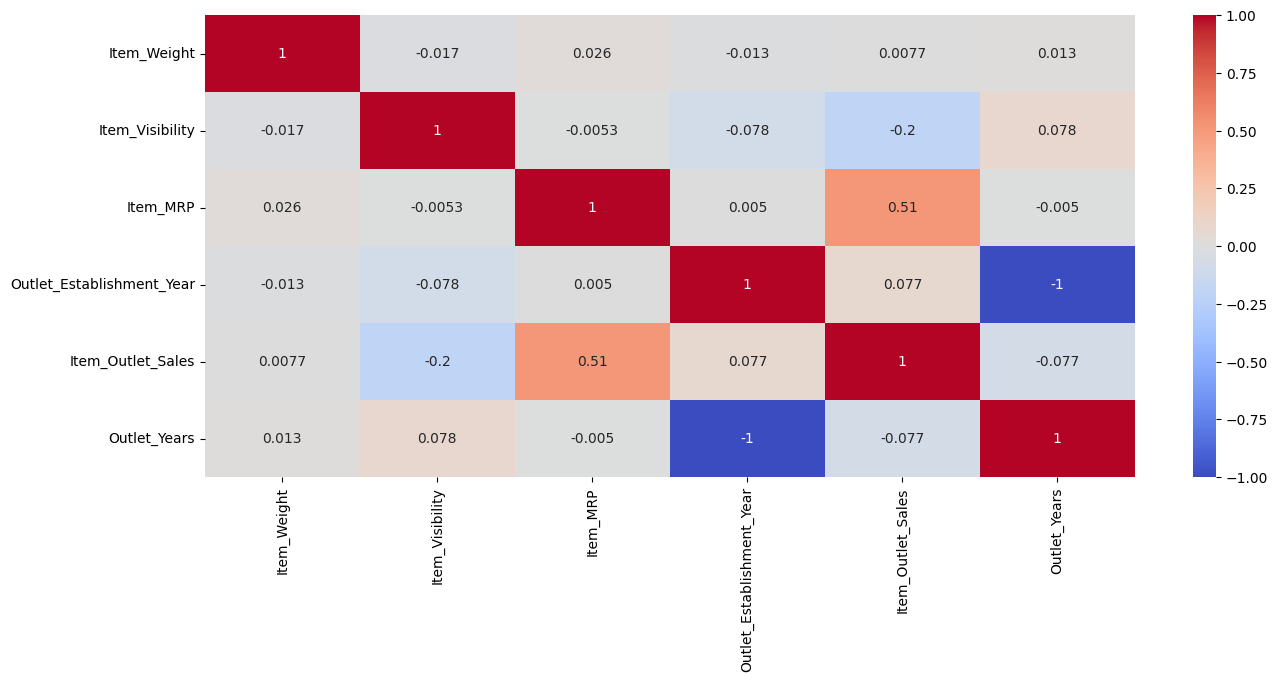

In [60]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [61]:
display (dt.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,26
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,27
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,38


In [62]:
for i in dt.columns:
    print(i)
    print(dt[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Weight
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       19.         16.2        11.8        18.5        15.1
 17.6        16.35        9.          8.26       13.35       18.85
  8.315      14.6        15.5        13.85       13.          7.645
 11.65        5.925      14.5        19.25       18.6        18.7
 17.85       10.         20.2         8.85        6.385      15.25
  9.8        13.6        21.35       12.15        6.42       19.6
 15.85       10.195       7.39        9.895      10.895       7.905
  9.195       8.365       5.94        7.97        6.215      17.7
 19.35        8.645      15.6        18.25        7.855       7.825
  8.39       12.85        5.905       7.76       16.75       12.6
  6.055       6.305      20.85       20.75        8.895      19.7
  7.93        8.75       13.3        20.6         8.31       19.75
 17.1        10.5         6.635       9.395      

# Label Encoder 

In [63]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Columns to encode
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
           'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'Outlet_Identifier']

# Dictionary to store encoders
encoders = {}

# Apply encoding properly
for col in cat_col:
    le = LabelEncoder()
    dt[col if col != 'Outlet_Identifier' else 'Outlet'] = le.fit_transform(dt[col])
    encoders[col] = le  # Save encoder with original column name

# Save all encoders
with open('encode.pkl', 'wb') as f:
    pickle.dump(encoders, f)

# One Hot Encoding

In [64]:
# dt = pd.get_dummies(dt, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
# display (dt.head())

In [65]:
X = dt.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Type'])
display (X.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,9.30,0,0.016047,249.8092,1,0,1,1,26,9
1,5.92,2,0.019278,48.2692,1,2,2,0,16,3
2,17.50,0,0.016760,141.6180,1,0,1,1,26,9
3,19.20,2,0.066132,182.0950,2,2,0,1,27,0
4,8.93,1,0.066132,53.8614,0,2,1,2,38,1


In [66]:
y = dt['Item_Outlet_Sales']
display (y.head())

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

# Train Function 

In [67]:
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):

    print ("Train Test Split")
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print (X.shape, y.shape)
    print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)
    
    # training the model
    model.fit(X_train, y_train)       
   
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    
    # Display Accuracy
    print ('Accuracy')
    print ('Accuracy of Test data')
    y_test_pred = model.predict(X_test)
    print('R2_Score:', r2_score(y_test,y_test_pred))
    print ('Accuracy of Training data')
    y_train_pred = model.predict(X_train)
    print('R2_Score:', r2_score(y_train,y_train_pred))
    print ('Accuracy of Complete data')
    y_pred = model.predict(X)
    print('R2_Score:', r2_score(y,y_pred))
    print ()

    # Display graph with actual and predicted values 
    
    plt.subplot (212)
    print ('Display actual and predicted values')
    sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
    plt.show()


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   d2_absolute_error_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_max_error,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   neg_root_mean_squared_log_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples, 

# Models

## Linear Regression

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.43446815 -0.42133184 -0.43582964 -0.43892754 -0.43943454]
ABS Average of - neg_mean_squared_error 0.43399834257780723

R2 Score 
[0.58749976 0.59164064 0.55245421 0.56689616 0.59244344]
Average R2 Score  0.5781868416562533

Accuracy
Accuracy of Test data
R2_Score: 0.5694211110747863
Accuracy of Training data
R2_Score: 0.5844794743066208
Accuracy of Complete data
R2_Score: 0.5798609510678235

Display actual and predicted values


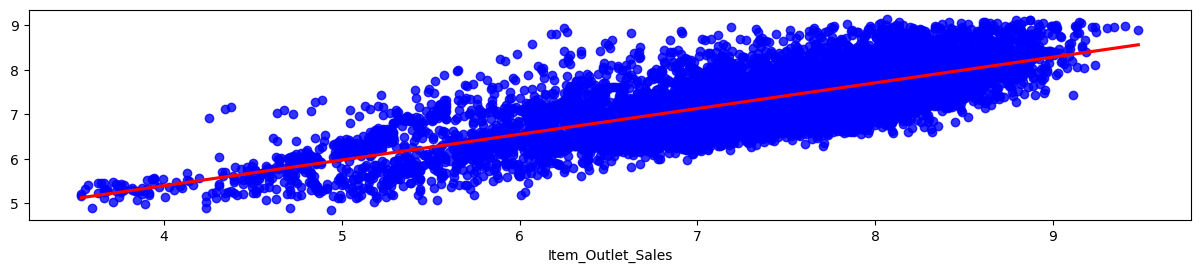

Item_Visibility        -1.439300
Outlet_Size            -0.304057
Outlet_Location_Type   -0.136515
Outlet_Years           -0.023013
Item_Weight            -0.002253
Item_MRP                0.008217
Item_Fat_Content        0.010394
New_Item_Type           0.013516
Outlet                  0.060926
Outlet_Type             0.559520
dtype: float64


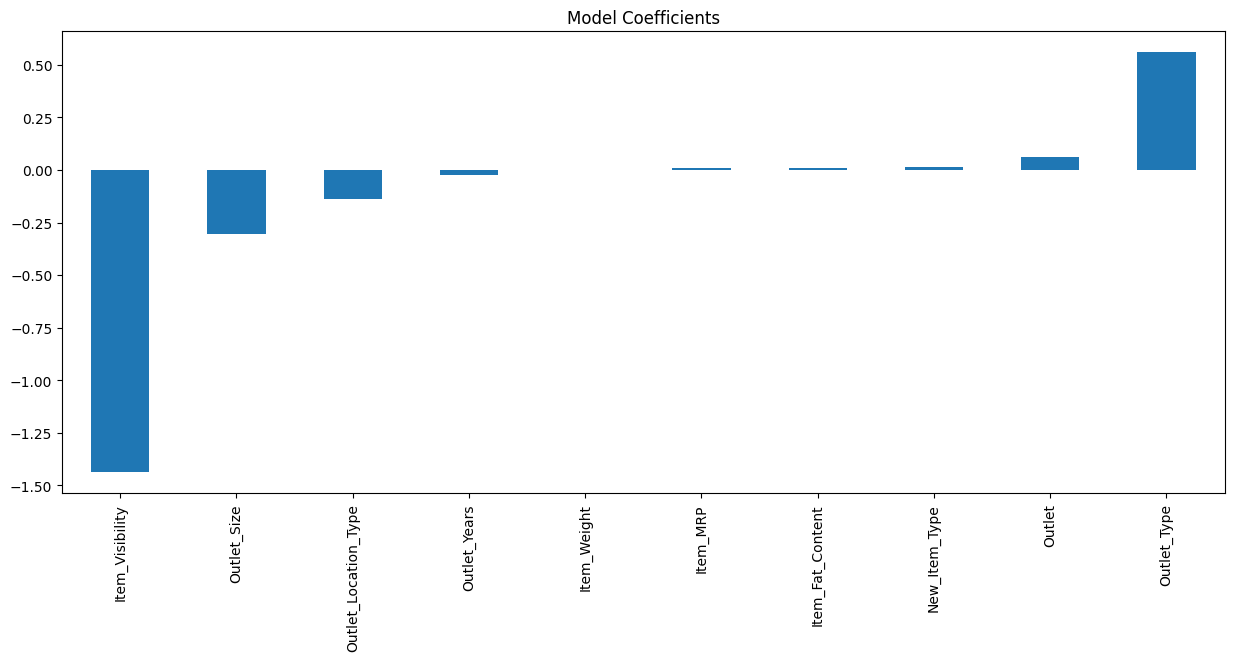

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

## Ridge Regression

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.43457596 -0.42139126 -0.43576533 -0.43884847 -0.43948004]
ABS Average of - neg_mean_squared_error 0.4340122124381837

R2 Score 
[0.58739741 0.59158305 0.55252025 0.56697417 0.59240124]
Average R2 Score  0.5781752239833959

Accuracy
Accuracy of Test data
R2_Score: 0.5693238170321893
Accuracy of Training data
R2_Score: 0.5844575827544998
Accuracy of Complete data
R2_Score: 0.5798159141405337

Display actual and predicted values


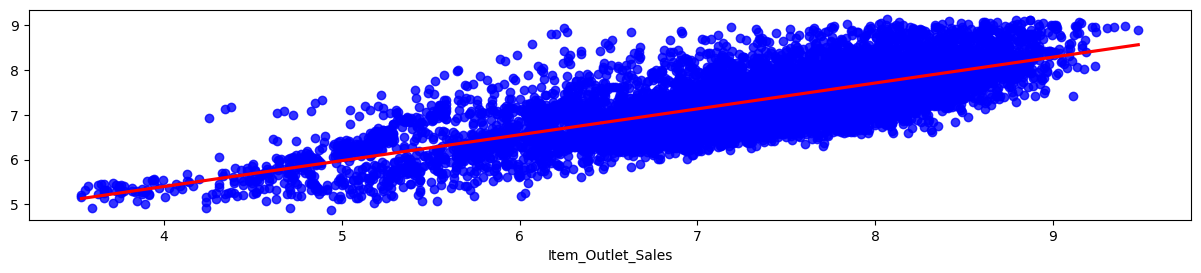

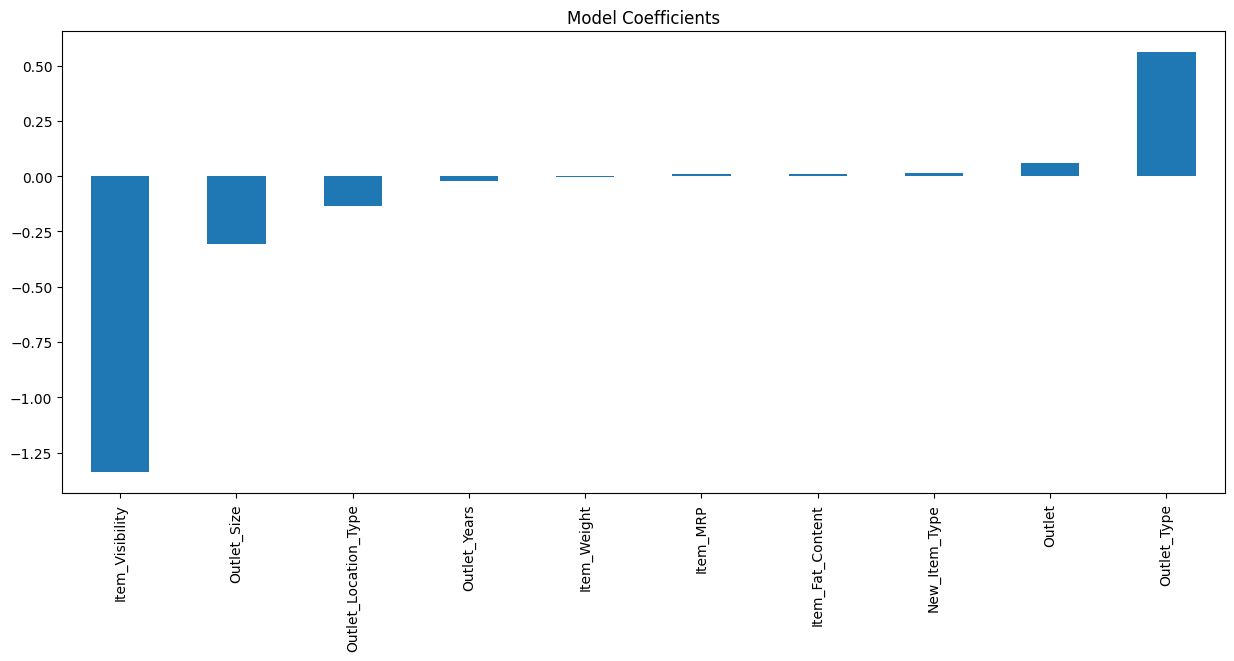

In [69]:
from sklearn.linear_model import Ridge
model = Ridge()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

## Lasso Regression

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.76444141 -0.75797033 -0.72014686 -0.75959604 -0.81323995]
ABS Average of - neg_mean_squared_error 0.7630789166281843

R2 Score 
[0.27421086 0.26536699 0.26049386 0.2504823  0.24575506]
Average R2 Score  0.2592618151206076

Accuracy
Accuracy of Test data
R2_Score: 0.2538352830427828
Accuracy of Training data
R2_Score: 0.26227683517122646
Accuracy of Complete data
R2_Score: 0.2596923551013075

Display actual and predicted values


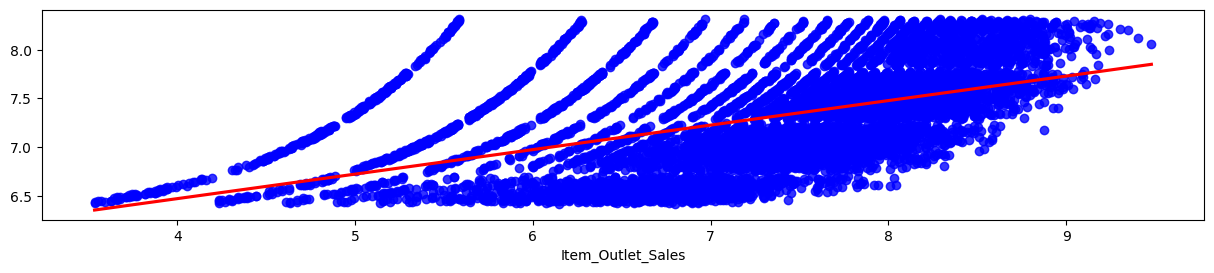

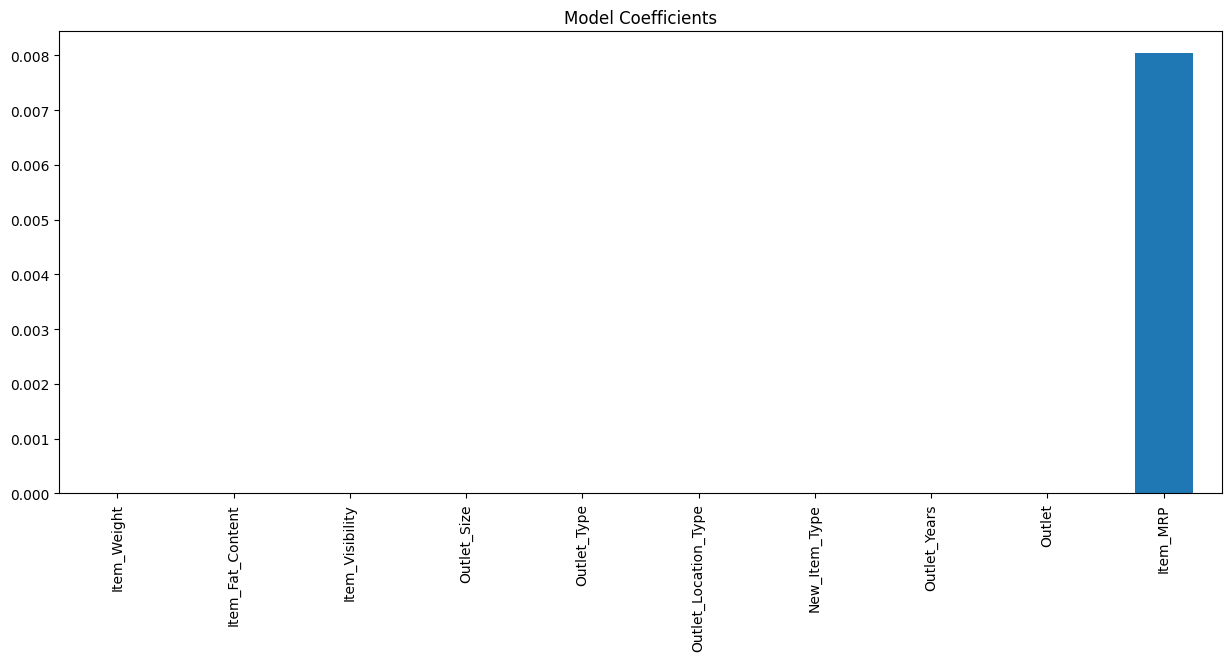

In [70]:
from sklearn.linear_model import Lasso
model = Lasso()
train(model, X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()

## DT Regressor

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.5845466  -0.57846186 -0.55908638 -0.60342121 -0.57213876]
ABS Average of - neg_mean_squared_error 0.5795309617338436

R2 Score 
[0.44255555 0.43726912 0.41857694 0.4168147  0.48624899]
Average R2 Score  0.44029305946361286

Accuracy
Accuracy of Test data
R2_Score: 0.4598104898520122
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.8341832363206141

Display actual and predicted values


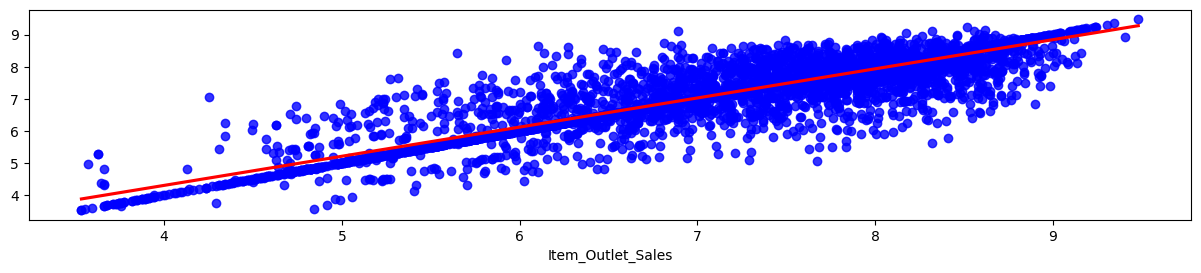

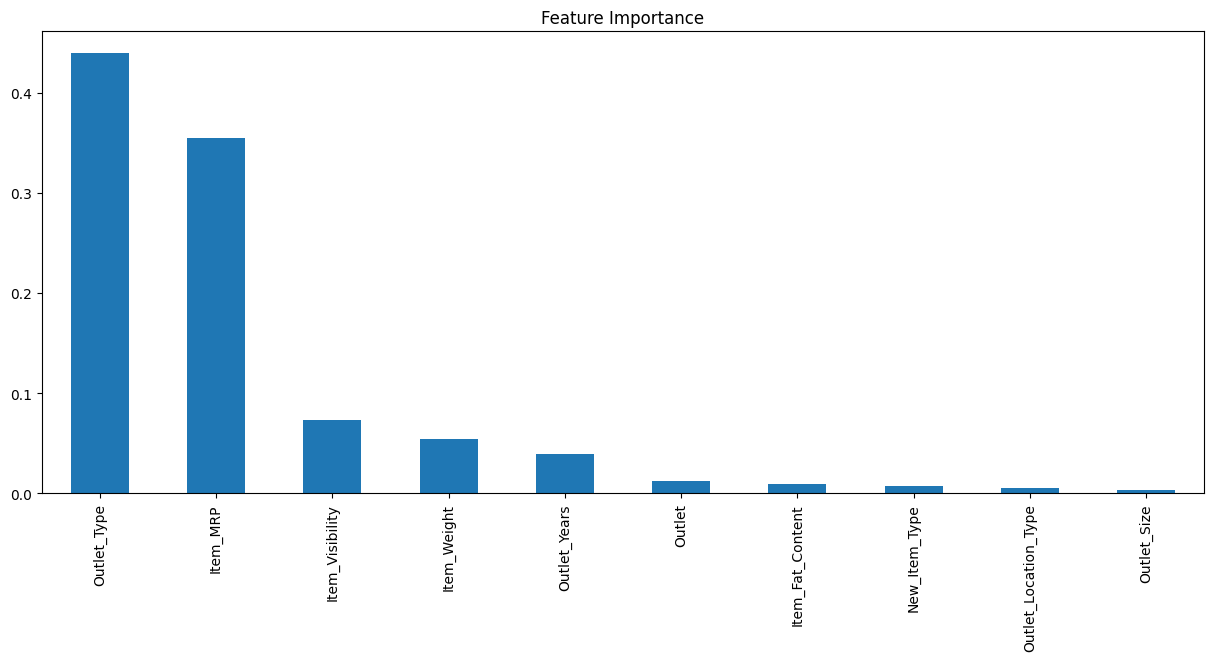

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

## RF Regressor

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.31926655 -0.31432207 -0.2990986  -0.31356979 -0.30124866]
ABS Average of - neg_mean_squared_error 0.30950113359921577

R2 Score 
[0.69905577 0.69245352 0.69487061 0.69160319 0.71942394]
Average R2 Score  0.6994814022887758

Accuracy
Accuracy of Test data
R2_Score: 0.6970365673431282
Accuracy of Training data
R2_Score: 0.9595454920121003
Accuracy of Complete data
R2_Score: 0.8789660290628556

Display actual and predicted values


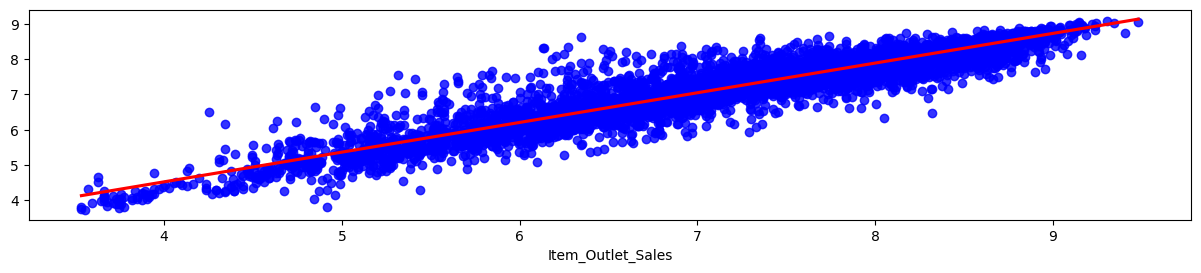

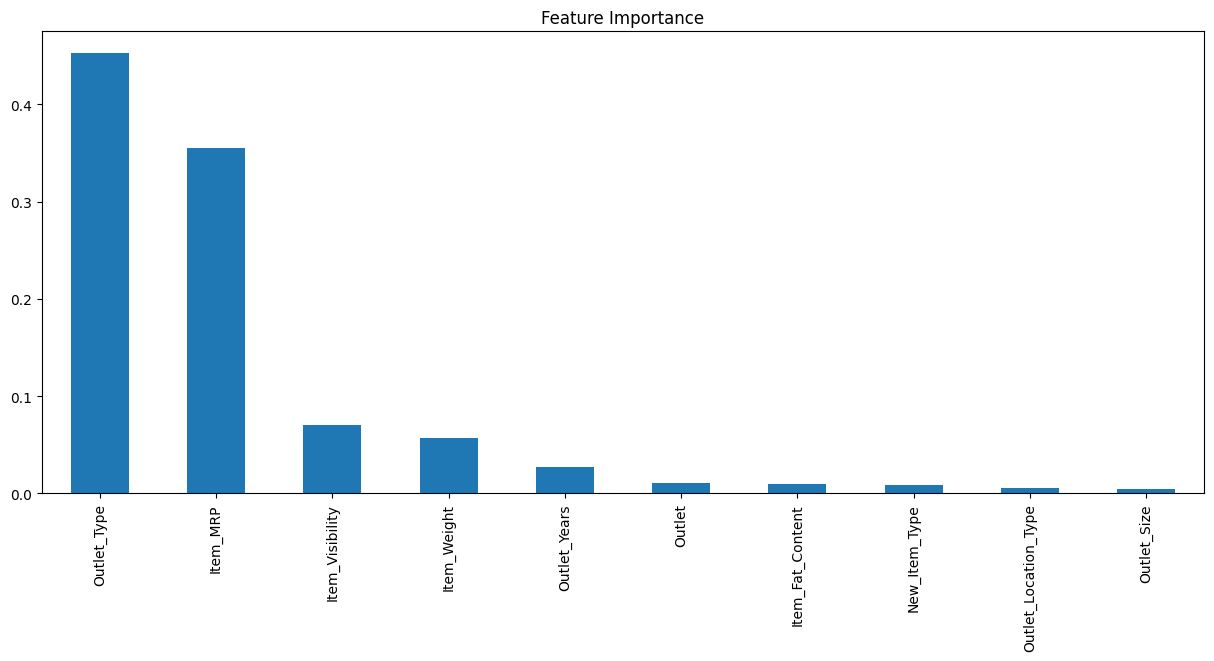

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

## Extra Tree Regressor

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-0.33839473 -0.33455533 -0.31930124 -0.33301701 -0.32936357]
ABS Average of - neg_mean_squared_error 0.3309263741247541

R2 Score 
[0.67891924 0.67806981 0.67460748 0.6671908  0.69204792]
Average R2 Score  0.6781670512865074

Accuracy
Accuracy of Test data
R2_Score: 0.6803280706060317
Accuracy of Training data
R2_Score: 1.0
Accuracy of Complete data
R2_Score: 0.9018733911424318

Display actual and predicted values


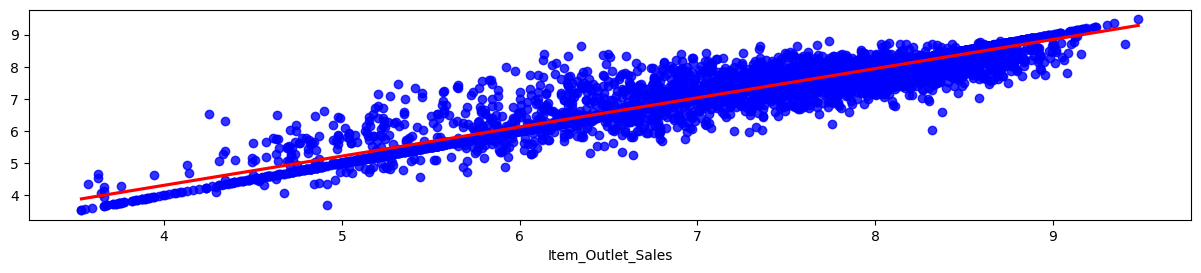

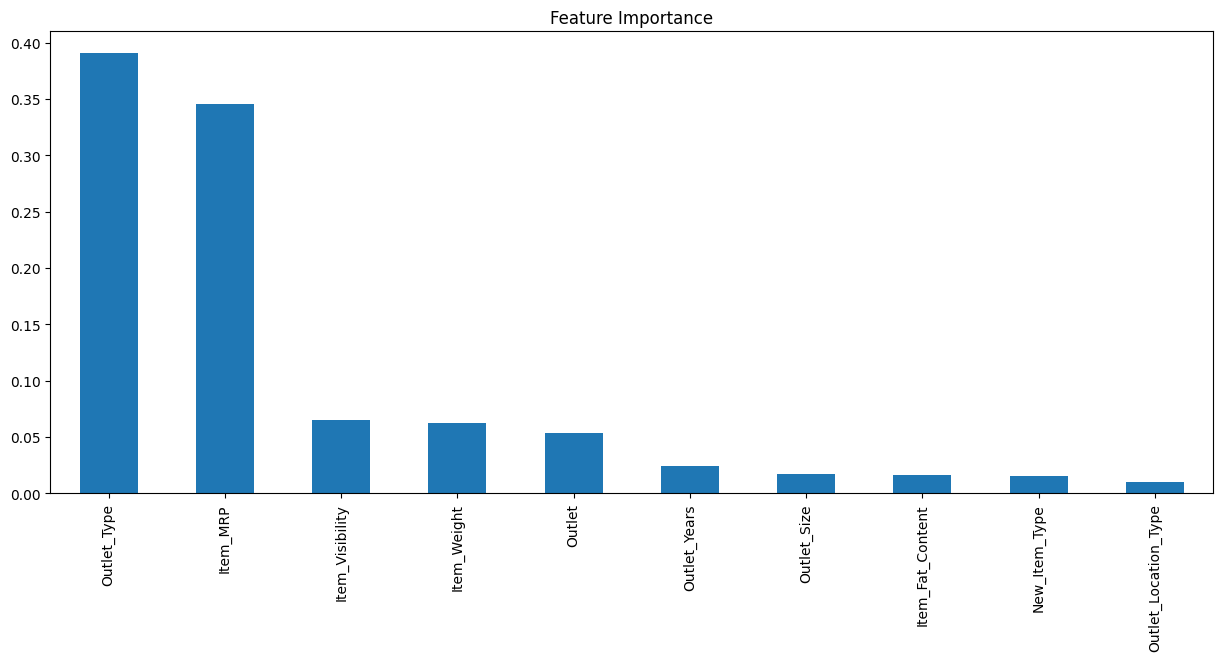

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

## LGBM Regressor

Train Test Split
(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 10
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

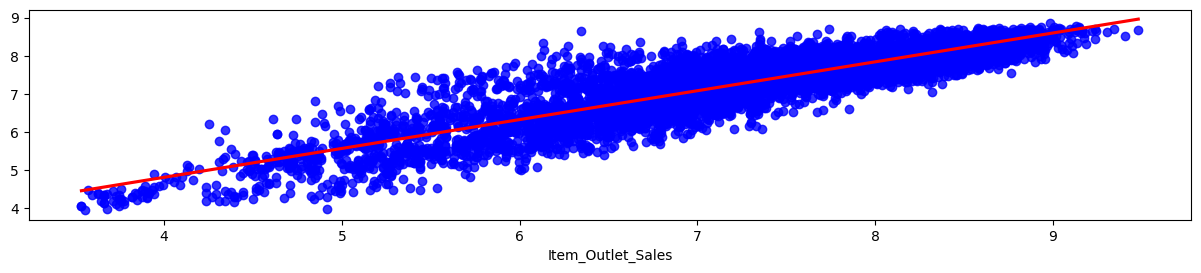

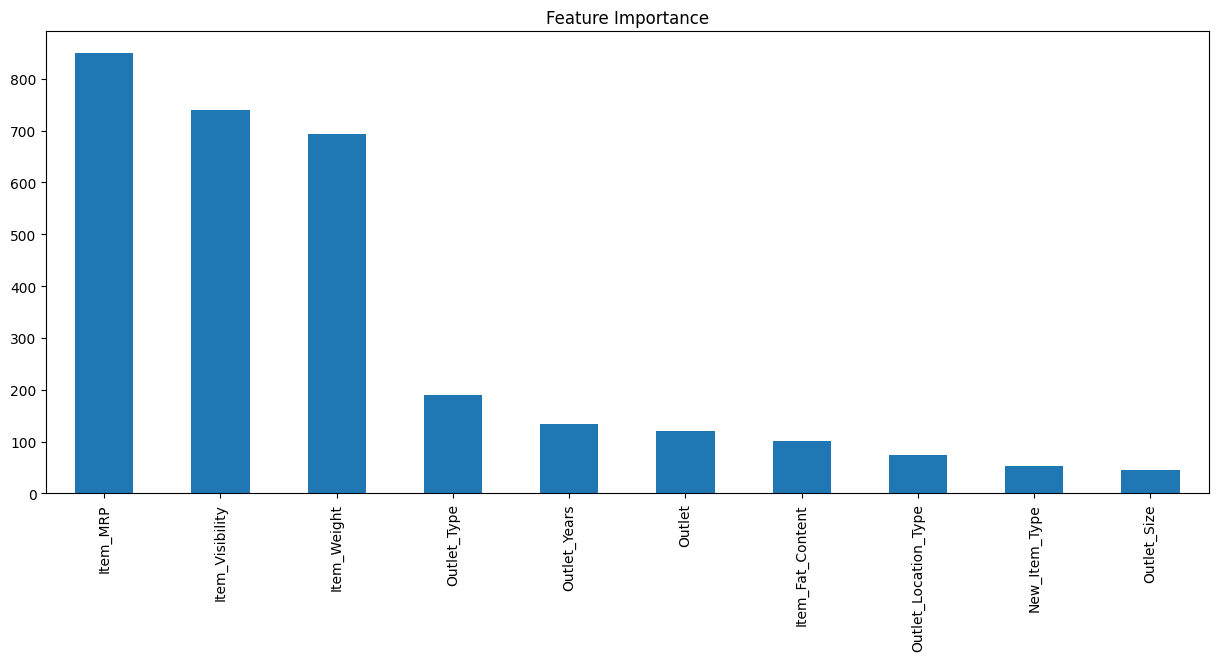

In [74]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)

(8523, 10) (8523,)
(5966, 10) (2557, 10) (5966,) (2557,)


In [76]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
88,6.305,2,0.123116,95.6436,2,0,1,1,28,8
6813,5.980,0,0.043809,146.8418,2,1,1,1,18,2
4046,13.500,1,0.072317,160.7920,1,2,3,2,40,5
8194,18.250,2,0.299098,157.8630,2,0,0,1,40,4
8293,9.100,1,0.080278,47.2718,2,1,1,2,21,6


In [77]:
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [78]:
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


# Random Search CV

## RF

In [79]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
display (rf.fit(X_train, y_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30}
-0.274620488173794

Accuracy
Accuracy of Test data
R2_Score: 0.7235017908626571
Accuracy of Training data
R2_Score: 0.8156639676856698
Accuracy of Complete data
R2_Score: 0.7873755177670757

Display actual and predicted values


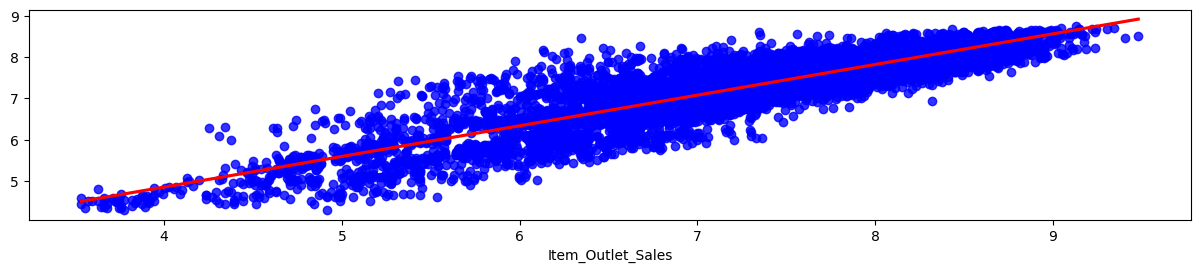

In [80]:
print(rf.best_params_)
print(rf.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = rf.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = rf.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = rf.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [81]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

## LGBM

In [82]:
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 10
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023F6A1B7FD0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023F6A397310>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F6A3822F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F6A396F80>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023F6A380940>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'gamma': np.float64(0.22007624686980065), 'learning_rate': np.float64(0.06661147045343364), 'max_depth': 2, 'n_estimators': 107, 'subsample': np.float64(0.6137554084460873)}
-0.270624934996642

Accuracy
Accuracy of Test data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7379363499223741
Accuracy of Training data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7474367970109371
Accuracy of Complete data
[LightGBM] [Warning] Unknown parameter: gamma
R2_Score: 0.7445228444794207

Display actual and predicted values


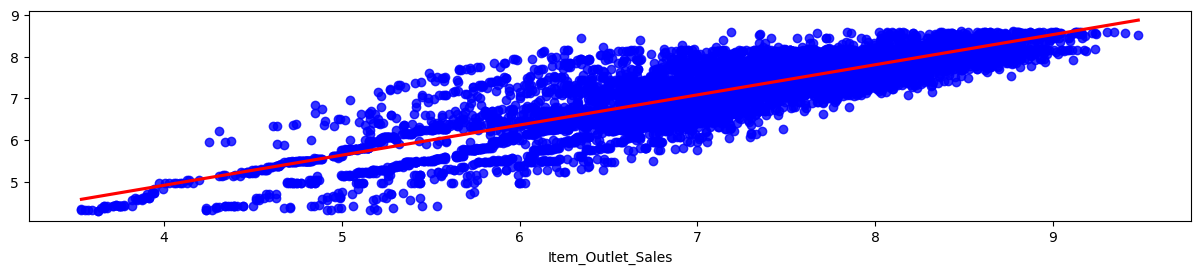

In [83]:
print(lgb.best_params_)
print(lgb.best_score_)

# Display Accuracy
print ()
print ('Accuracy')
print ('Accuracy of Test data')
y_test_pred = lgb.predict(X_test)
print('R2_Score:', r2_score(y_test,y_test_pred))
print ('Accuracy of Training data')
y_train_pred = lgb.predict(X_train)
print('R2_Score:', r2_score(y_train,y_train_pred))
print ('Accuracy of Complete data')
y_pred = lgb.predict(X)
print('R2_Score:', r2_score(y,y_pred))
print ()

# Display graph with actual and predicted values 
    
plt.subplot (212)
print ('Display actual and predicted values')
sns.regplot( x =y, y= y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"},ci = None)
plt.show()

In [84]:
import pickle
pickle.dump(lgb, open('model.pkl', 'wb'))

In [85]:
model = pickle.load(open('model.pkl', 'rb'))

In [86]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,26,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,16,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,26,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,27,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,38,1


In [87]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
88,6.305,2,0.123116,95.6436,2,0,1,1,28,8
6813,5.980,0,0.043809,146.8418,2,1,1,1,18,2
4046,13.500,1,0.072317,160.7920,1,2,3,2,40,5
8194,18.250,2,0.299098,157.8630,2,0,0,1,40,4
8293,9.100,1,0.080278,47.2718,2,1,1,2,21,6


In [88]:
dt['Item_Outlet_Sales'].mean()

np.float64(7.29786332009444)